СЕГМЕНТАЦИЯ БЕЗКАПУСТНЫХ ОБЛАСТЕЙ ЗЕМЛИ

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive #подключаем библиотеку для работы с google диском
drive.mount('/content/drive') #монтируем google диск

Mounted at /content/drive


In [ ]:
# Install the ultralytics package from PyPI
!pip install ultralytics

In [ ]:
import os
from IPython.display import Image
from ultralytics import YOLO

model = YOLO('yolov8n-seg.pt')  # load a pretrained model (recommended for training)

results = model.train(data='/content/drive/MyDrive/Colab Notebooks/Bad area on the cabbage field.v1i.yolov8/data.yaml', epochs=20, imgsz=640)


100%|██████████| 6.73M/6.73M [00:00<00:00, 113MB/s]
Ultralytics YOLOv8.0.203 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/drive/MyDrive/Colab Notebooks/Bad area on the cabbage field.v1i.yolov8/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False

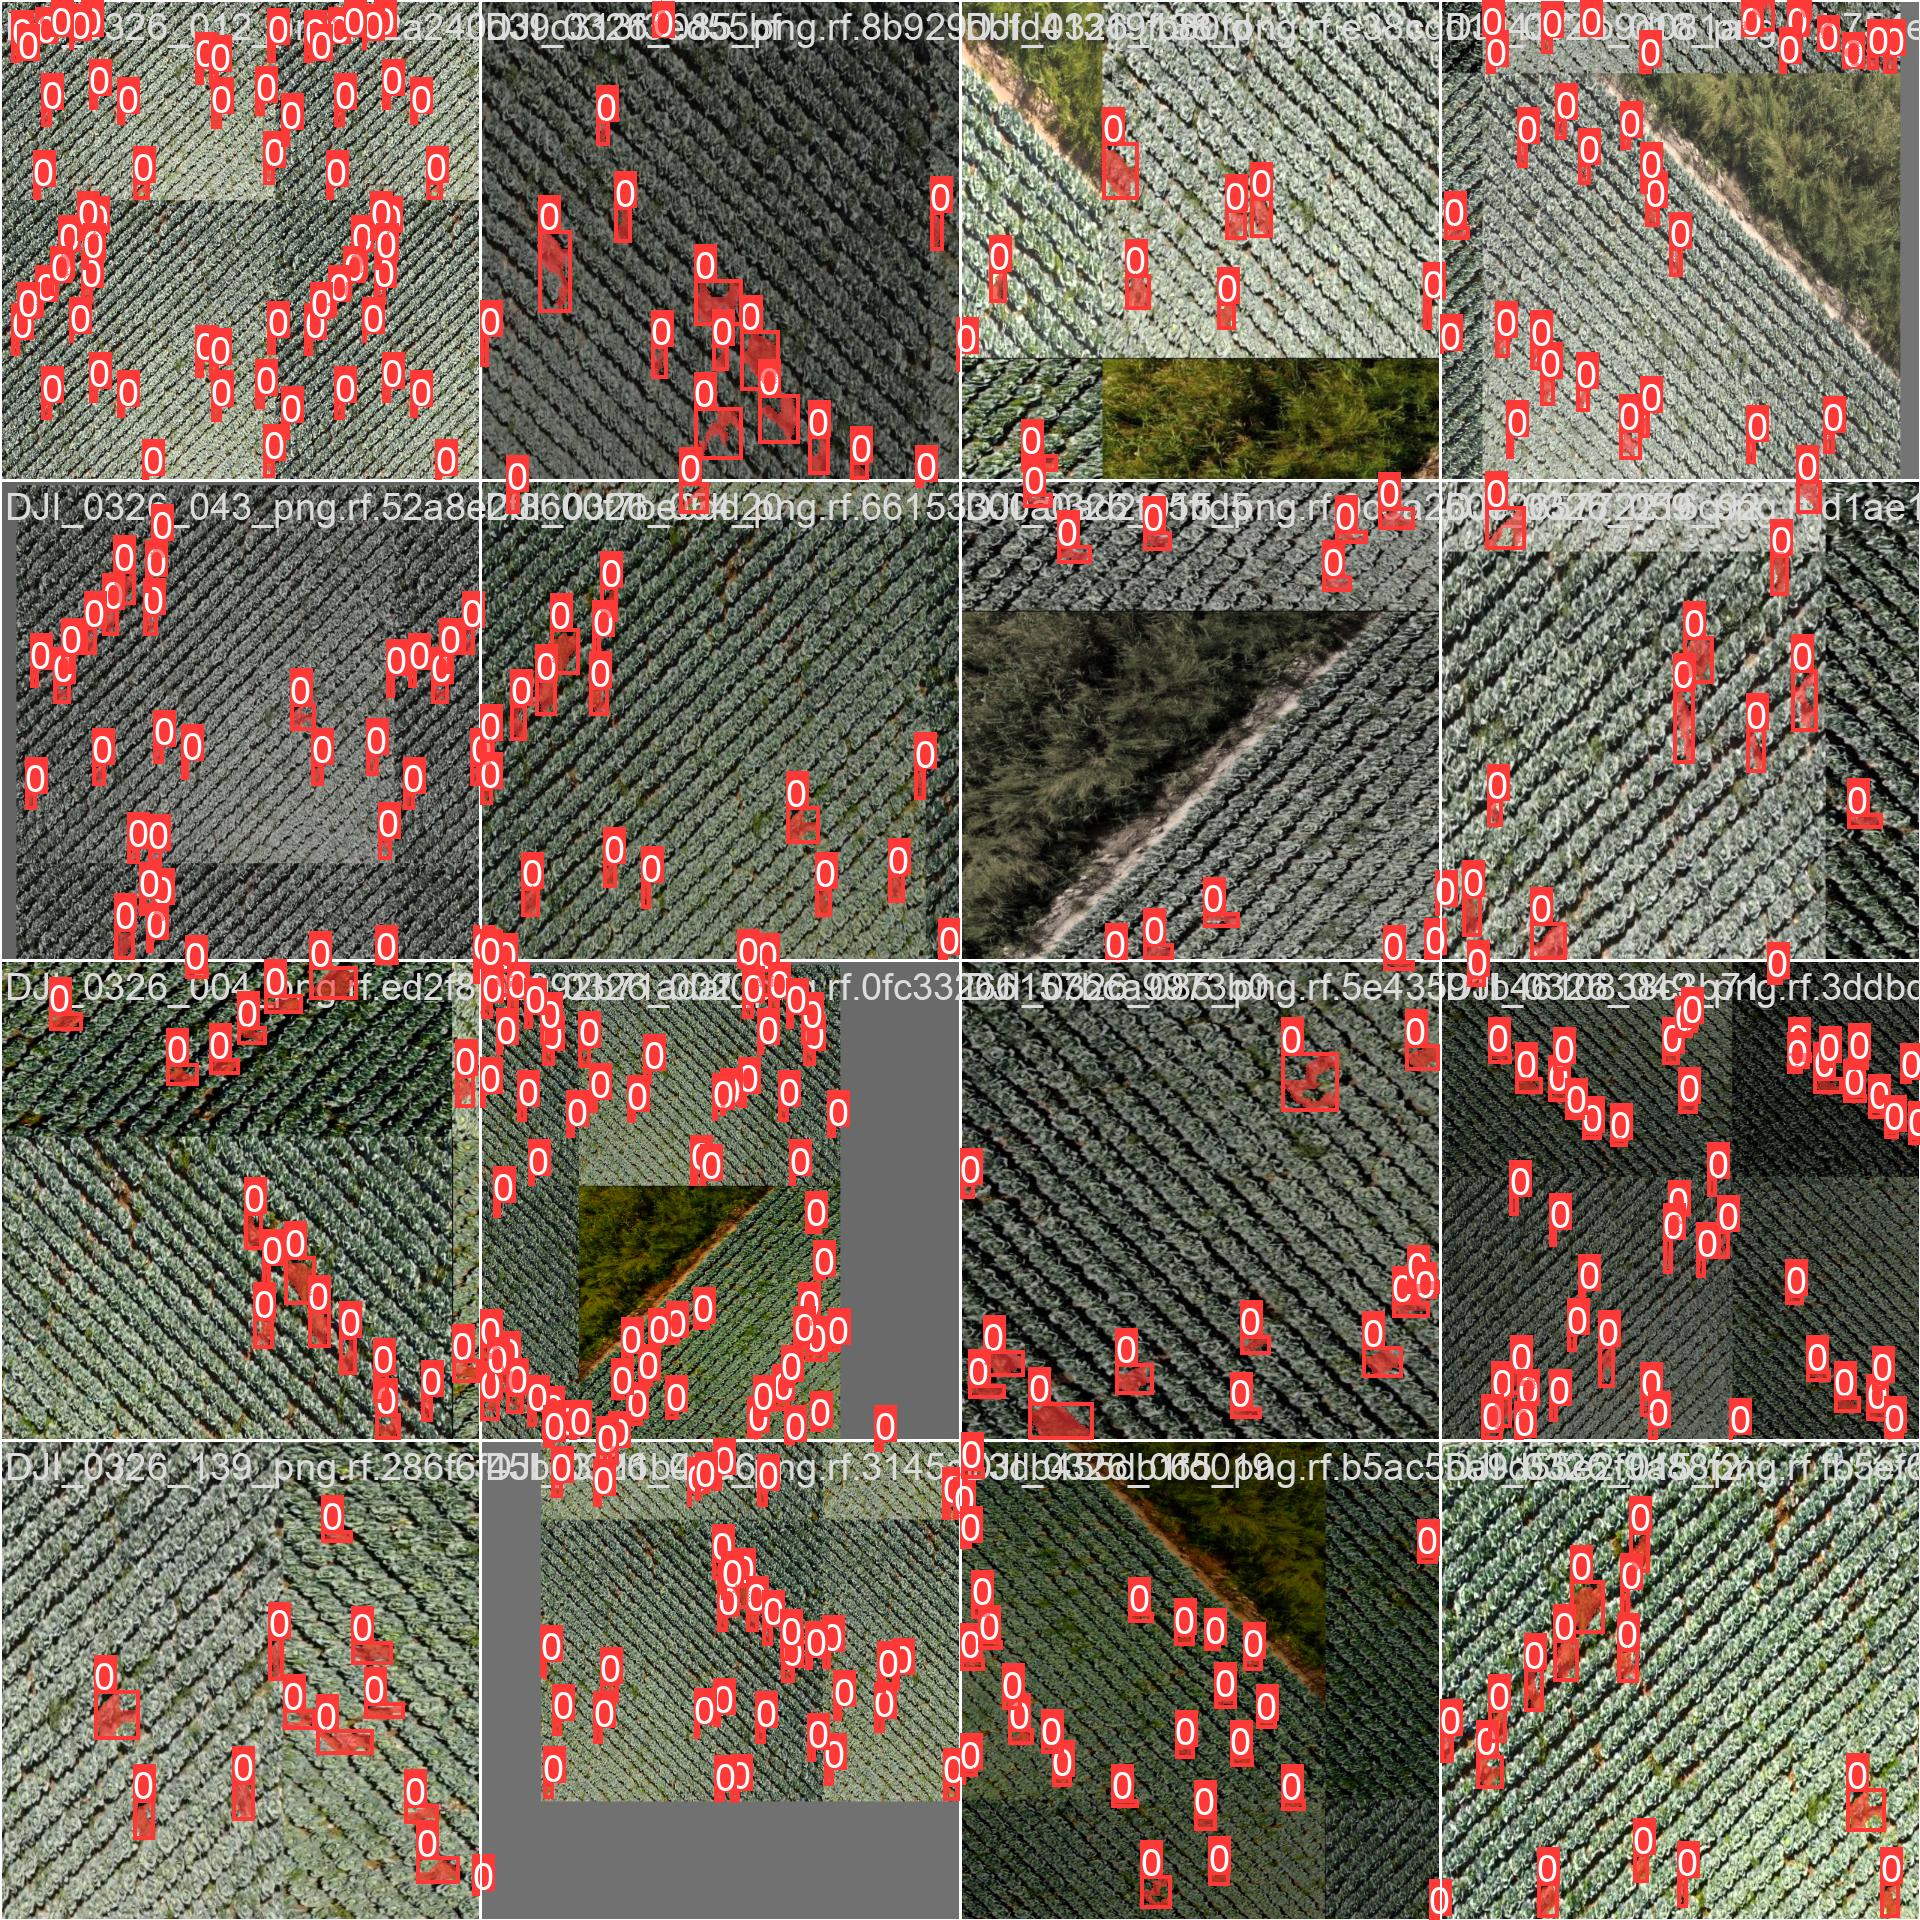

In [ ]:
# Вывести итог обучения
from IPython.display import Image
Image(filename='/content/runs/segment/train/train_batch0.jpg', height=600)


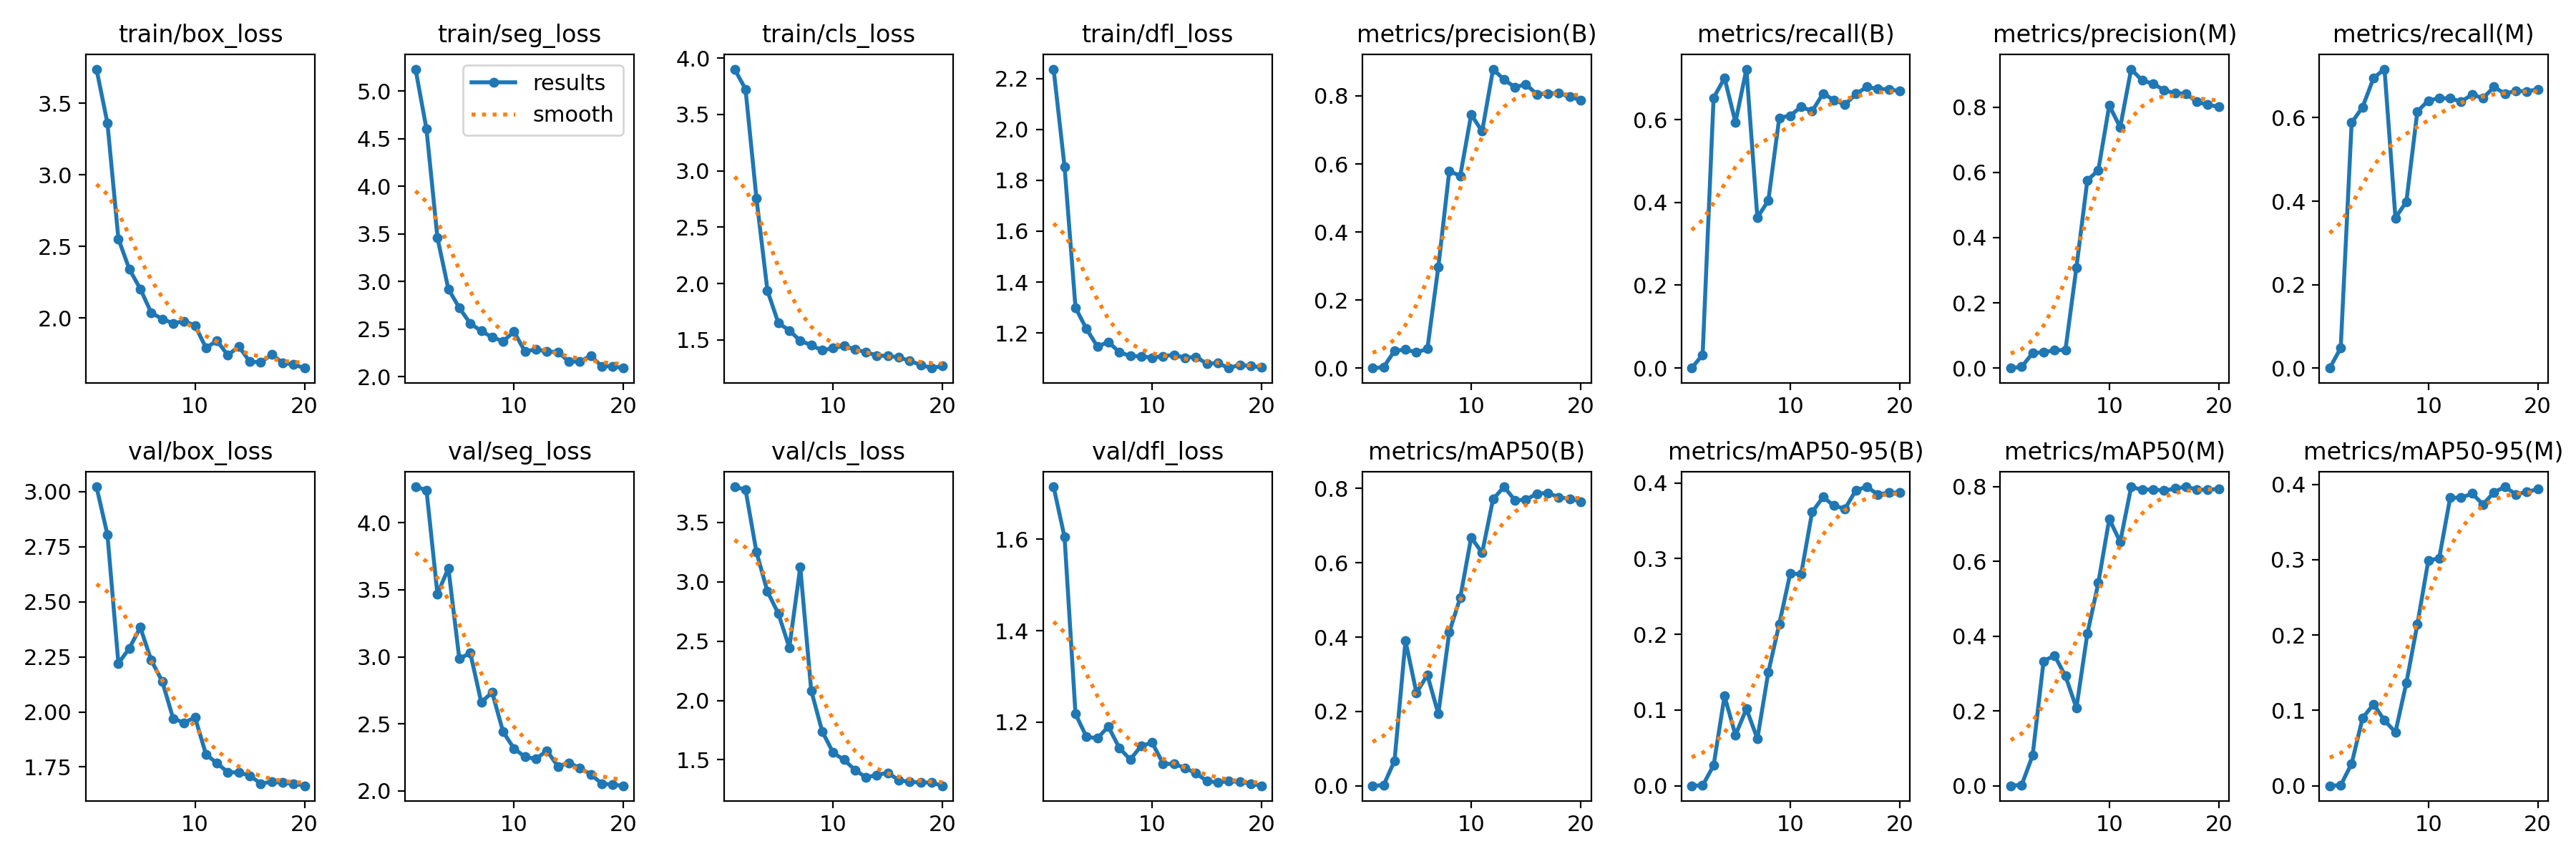

In [ ]:
Image(filename='/content/runs/segment/train/results.png', height=600)

In [ ]:
model = YOLO("/content/runs/segment/train/weights/best.pt")
#сохранение весов, чтобы не учить после перезагрузки колаба:

import shutil

# Путь к исходному файлу
source_path = '/content/runs/segment/train/weights/best.pt'

# Путь к целевой папке на Google Диске
target_path = '/content/drive/MyDrive/'

# Копирование файла на Google Диск
shutil.copy(source_path, target_path)

'/content/drive/MyDrive/best.pt'

In [ ]:
# Восстановление модели с лучшими весами
import os
from IPython.display import Image
from ultralytics import YOLO
model = YOLO('/content/drive/MyDrive/best.pt')

In [ ]:
# валидация, проверка

model.val(data="/content/drive/MyDrive/Colab Notebooks/Bad area on the cabbage field.v1i.yolov8/data.yaml", conf=0.5)

Ultralytics YOLOv8.0.203 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients, 12.0 GFLOPs
val: Scanning /content/drive/MyDrive/Colab Notebooks/Bad area on the cabbage field.v1i.yolov8/valid/labels.cache... 8 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8/8 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]
                   all          8        187      0.964      0.283      0.627       0.38      0.964      0.283      0.627      0.383
Speed: 0.3ms preprocess, 30.3ms inference, 0.2ms loss, 1.1ms postprocess per image
Results saved to runs/segment/val


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x780bf05d0340>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041, 

In [ ]:
# Предикт на картинке

results = model.predict(source="/content/drive/MyDrive/Colab Notebooks/Bad area on the cabbage field.v1i.yolov8/test/images/DJI_0326_010_png.rf.707603814503dcec1617a5274493bad8.jpg")


image 1/1 /content/drive/MyDrive/Colab Notebooks/Bad area on the cabbage field.v1i.yolov8/test/images/DJI_0326_010_png.rf.707603814503dcec1617a5274493bad8.jpg: 640x640 20 poor_lands, 10.5ms
Speed: 2.9ms preprocess, 10.5ms inference, 13.9ms postprocess per image at shape (1, 3, 640, 640)


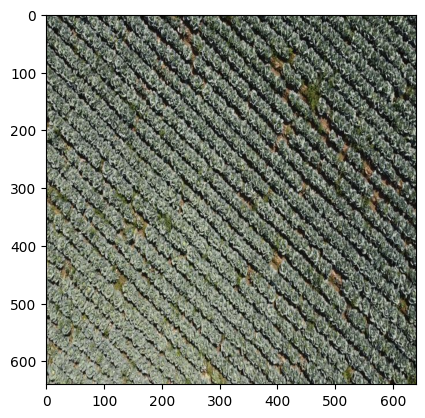

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Берем то что выше вывелось и подставляем сюда:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Bad area on the cabbage field.v1i.yolov8/test/images/DJI_0326_010_png.rf.707603814503dcec1617a5274493bad8.jpg')

# отображение изображения
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('on')
plt.show()

Детекция по видео заказчика

In [ ]:
import moviepy
from moviepy.editor import *
from moviepy.editor import VideoFileClip
from IPython.display import display, clear_output

# посмотреть видео
myvideo = VideoFileClip('/content/drive/MyDrive/zoomcam3_ZleDyM7I.mp4')
ipython_display(myvideo)

Moviepy - Building video __temp__.mp4.
MoviePy - Writing audio in __temp__TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video __temp__.mp4



t: 100%|█████████▉| 586/587 [00:22<00:00, 21.89it/s, now=None]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file /content/drive/MyDrive/zoomcam3_ZleDyM7I.mp4, 6220800 bytes wanted but 0 bytes read,at frame 586/587, at time 19.55/19.56 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [ ]:
#!pip install wget
#import wget

In [ ]:
from IPython.display import IFrame

# Ссылка на видео
#video_url = "https://drive.google.com/file/d/1MafvlTTjOnLt7ED1XtsD4Acjlu0yTNLb/view?usp=sharing"
video_url = "/segment/predict2/origcam1(1).avi"

# Отображаем видео через IFrame
IFrame(video_url, width="640", height="480")

In [ ]:
import os
from IPython.display import Image
from ultralytics import YOLO

model = YOLO('yolov8n-seg.pt')  # load a pretrained model (recommended for training)
model = YOLO('/content/drive/MyDrive/best.pt')
model.predict(source="/content/drive/MyDrive/zoomcam3_ZleDyM7I.mp4", save=True, show=True)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/586) /content/drive/MyDrive/zoomcam3_ZleDyM7I.mp4: 384x640 (no detections), 109.9ms
video 1/1 (2/586) /content/drive/MyDrive/zoomcam3_ZleDyM7I.mp4: 384x640 (no detections), 10.3ms
video 1/1 (3/586) /content/drive/MyDrive/zoomcam3_ZleDyM7I.mp4: 384x640 (no detections), 10.8ms
video 1/1 (4/586) /content/drive/MyDrive/zoomcam3_ZleDyM7I.mp4: 384x640 (no detections), 12.5

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'poor_land'}
 orig_img: array([[[243, 253, 252],
         [243, 253, 252],
         [243, 253, 252],
         ...,
         [ 57,  48,  25],
         [ 57,  48,  25],
         [ 57,  48,  25]],
 
        [[243, 253, 252],
         [243, 253, 252],
         [243, 253, 252],
         ...,
         [ 57,  48,  25],
         [ 57,  48,  25],
         [ 57,  48,  25]],
 
        [[243, 253, 252],
         [243, 253, 252],
         [243, 253, 252],
         ...,
         [ 57,  48,  25],
         [ 57,  48,  25],
         [ 57,  48,  25]],
 
        ...,
 
        [[204, 255, 255],
         [204, 255, 255],
         [208, 255, 255],
         ...,
         [ 53,  41,  27],
         [ 55,  43,  29],
         [ 57,  45,  31]],
 
        [[204, 255, 255],
         [204, 255, 255],
         [208, 255, 255],
         ...,
         [ 53,  41,  27],


In [ ]:
model.predict(source="/content/drive/MyDrive/origcam1(1).mp4", save=True, show=True)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/1083) /content/drive/MyDrive/origcam1(1).mp4: 384x640 (no detections), 94.7ms
video 1/1 (2/1083) /content/drive/MyDrive/origcam1(1).mp4: 384x640 (no detections), 10.8ms
video 1/1 (3/1083) /content/drive/MyDrive/origcam1(1).mp4: 384x640 (no detections), 11.0ms
video 1/1 (4/1083) /content/drive/MyDrive/origcam1(1).mp4: 384x640 (no detections), 8.1ms
video 1/1 (5/1083) 

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'poor_land'}
 orig_img: array([[[ 32,  54,  35],
         [ 23,  45,  26],
         [ 56,  78,  59],
         ...,
         [ 15,  48,  32],
         [ 43,  76,  60],
         [ 63,  96,  80]],
 
        [[ 33,  55,  36],
         [ 31,  53,  34],
         [ 44,  66,  47],
         ...,
         [ 87, 120, 104],
         [ 73, 106,  90],
         [ 57,  90,  74]],
 
        [[ 23,  45,  26],
         [ 51,  73,  54],
         [ 54,  76,  57],
         ...,
         [ 44,  77,  61],
         [ 35,  68,  52],
         [ 36,  69,  53]],
 
        ...,
 
        [[ 82, 101,  85],
         [ 45,  64,  48],
         [ 52,  71,  55],
         ...,
         [ 33,  77,  54],
         [ 46,  90,  67],
         [ 40,  84,  61]],
 
        [[102, 121, 105],
         [ 68,  87,  71],
         [ 55,  74,  58],
         ...,
         [ 26,  70,  47],


In [ ]:
!python detect.py --weights /content/runs/segment/train/weights/best.pt --source "/content/drive/MyDrive/zoomcam3_ZleDyM7I.mp4"

python3: can't open file '/content/detect.py': [Errno 2] No such file or directory


In [ ]:
!pip install moviepy

In [ ]:
from moviepy.editor import *

In [ ]:
!ls -1 /content/drive/MyDrive/zoomcam3_ZleDyM7I.mp4

/content/drive/MyDrive/zoomcam3_ZleDyM7I.mp4


In [ ]:
import cv2
from IPython.display import YouTubeVideo
from IPython.display import HTML
from IPython.display import Video
Video("/content/drive/MyDrive/zoomcam3_ZleDyM7I.mp4", embed=True, html_attributes="control muted autoplay")

In [ ]:
# Отображаем видео через IFrame
from IPython.display import IFrame
#IFrame("/content/runs/segment/predict2/origcam1(1).avi", width="640", height="640")
IFrame("/content/drive/MyDrive/zoomcam3_ZleDyM7I.mp4", width="640", height="640")